In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
from datetime import datetime

CPU times: total: 3.52 s
Wall time: 11.8 s


In [2]:
pd.set_option('display.max_columns', None) #Display all columns
data = pd.read_csv(r"F:\All_Projects\Tugende_Assessment\Test2 - Data.csv")

In [3]:
data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-03,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-10,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-17,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-24,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-31,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23


In [4]:
#report_date column adjustment to reflect the correct reporting week
data['report_date'].head()

0    2021-01-03
1    2021-01-10
2    2021-01-17
3    2021-01-24
4    2021-01-31
Name: report_date, dtype: object

In [5]:
data['report_date'] = pd.to_datetime(data['report_date'], errors='coerce')
data['disbursement_date'] = pd.to_datetime(data['disbursement_date'], errors='coerce')

# Display the result
print(data['report_date'])

0        2021-01-03
1        2021-01-10
2        2021-01-17
3        2021-01-24
4        2021-01-31
            ...    
182995   2024-06-02
182996   2024-06-09
182997   2024-06-16
182998   2024-06-23
182999   2024-06-30
Name: report_date, Length: 183000, dtype: datetime64[ns]


In [6]:
data['report_date'].min()

Timestamp('2021-01-03 00:00:00')

In [7]:
data['report_date'].max()

Timestamp('2024-06-30 00:00:00')

In [8]:
#Calculate the week start based on Sunday
data['report_date'] = data['report_date'] - pd.to_timedelta(data['report_date'].dt.weekday, unit='D')

In [9]:
#Extract only the date component
#data['report_date'] = data['report_date'].dt.date
#data['disbursement_date'] = data['disbursement_date'].dt.date

In [10]:
data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2020-12-28,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-04,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-11,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-18,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-25,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23


In [11]:
import pandas as pd
import yfinance as yf

In [12]:
datemin = data['disbursement_date'].min()
datemax = data['disbursement_date'].max()
print(datemin)
print(datemax)

2022-01-01 00:00:00
2022-12-28 00:00:00


In [13]:
msft = yf.Ticker("MSFT")

In [14]:
import yfinance as yf
import pandas as pd

ugx_exchange_rates = yf.download('UGX=X', start='2022-01-01', end='2022-12-28') 

[*********************100%***********************]  1 of 1 completed


In [15]:
kenya_exchange_rates = yf.download('KES=X', start='2022-01-01', end='2022-12-28')

[*********************100%***********************]  1 of 1 completed


In [16]:
ugx_exchange_rates.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,3493.238770,3506.673096,3493.238770,3505.955322,3505.955322,0
2022-01-04,3520.583008,3520.583008,3501.675537,3506.673096,3506.673096,0
2022-01-05,3500.093018,3501.082520,3500.093018,3501.675537,3501.675537,0
2022-01-06,3501.360840,3503.454102,3501.360840,3501.082520,3501.082520,0
2022-01-07,3507.127930,3507.127930,3505.462891,3503.454102,3503.454102,0


In [17]:
kenya_exchange_rates.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,112.150002,112.199997,111.760002,112.150002,112.150002,0
2022-01-04,112.150002,112.639999,112.099998,112.150002,112.150002,0
2022-01-05,112.129997,112.269997,111.906929,112.129997,112.129997,0
2022-01-06,112.150002,113.050003,112.099998,112.150002,112.150002,0
2022-01-07,112.250000,112.309998,112.139999,112.250000,112.250000,0


In [18]:
ugx_exchange_rates.columns.tolist()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [19]:
#Making 'Date' a column
ugx_exchange_rates = ugx_exchange_rates.reset_index(drop=False)
ugx_exchange_rates = ugx_exchange_rates.rename(columns={'index': 'Date'})

#Making 'Date' a column
kenya_exchange_rates = kenya_exchange_rates.reset_index(drop=False)
kenya_exchange_rates = kenya_exchange_rates.rename(columns={'index': 'Date'})

In [20]:
ugx_exchange_rates.columns.tolist()
kenya_exchange_rates.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [21]:
ugx_exchange_rates.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,3493.238770,3506.673096,3493.238770,3505.955322,3505.955322,0
1,2022-01-04,3520.583008,3520.583008,3501.675537,3506.673096,3506.673096,0
2,2022-01-05,3500.093018,3501.082520,3500.093018,3501.675537,3501.675537,0
3,2022-01-06,3501.360840,3503.454102,3501.360840,3501.082520,3501.082520,0
4,2022-01-07,3507.127930,3507.127930,3505.462891,3503.454102,3503.454102,0


In [22]:
kenya_exchange_rates.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,112.150002,112.199997,111.760002,112.150002,112.150002,0
1,2022-01-04,112.150002,112.639999,112.099998,112.150002,112.150002,0
2,2022-01-05,112.129997,112.269997,111.906929,112.129997,112.129997,0
3,2022-01-06,112.150002,113.050003,112.099998,112.150002,112.150002,0
4,2022-01-07,112.250000,112.309998,112.139999,112.250000,112.250000,0


In [23]:
exchange_rate_data = ugx_exchange_rates[ugx_exchange_rates['Date'] == '2022-07-06']
print(exchange_rate_data)

          Date         Open         High          Low        Close  \
132 2022-07-06  3683.000732  3716.583984  3683.000732  3670.915527   

       Adj Close  Volume  
132  3670.915527       0  


In [24]:
exchange_rate_data_u = ugx_exchange_rates[ugx_exchange_rates['Date'] == '2022-06-07']
print(exchange_rate_data_u)

exchange_rate_data_k = kenya_exchange_rates[kenya_exchange_rates['Date'] == '2022-06-07']
print(exchange_rate_data_k)

          Date         Open         High          Low        Close  \
111 2022-06-07  3723.429199  3723.429199  3698.196289  3708.416748   

       Adj Close  Volume  
111  3708.416748       0  
          Date        Open        High         Low       Close   Adj Close  \
111 2022-06-07  115.949997  116.379997  115.504898  115.949997  115.949997   

     Volume  
111       0  


In [25]:
# Merge both dataframes, Only Introduce the closing exchange rates column "Close" for Ugx
data = data.merge(ugx_exchange_rates[['Date','Close']], left_on='disbursement_date', right_on='Date', how='left')

In [26]:
#Rename the closing rate as Closing_Exchange_Rate
data = data.rename(columns={'Close': 'Closing_Exchange_Rate_ugx'})

In [27]:
# Merge both dataframes, Only Introduce the closing exchange rates column "Close" for kes
data = data.merge(kenya_exchange_rates[['Date','Close']], left_on='disbursement_date', right_on='Date', how='left')

In [28]:
#Rename the closing rate as Closing_Exchange_Rate
data = data.rename(columns={'Close': 'Closing_Exchange_Rate_kes'})

In [29]:
data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Date_x,Closing_Exchange_Rate_ugx,Date_y,Closing_Exchange_Rate_kes
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2020-12-28,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08,NaT,NaN,NaT,NaN
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-04,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26,NaT,NaN,NaT,NaN
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-11,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26,NaT,NaN,NaT,NaN
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-18,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10,NaT,NaN,NaT,NaN
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-25,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23,NaT,NaN,NaT,NaN


In [30]:
#Sampling a random day, checking id rate has been correctly merged
View_row_data = data[data['Date_x'] == '2022-03-03']
View_row_data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Date_x,Closing_Exchange_Rate_ugx,Date_y,Closing_Exchange_Rate_kes
23058,L0127,C7059,Kampala,Bike,4000000,0.015,120,2022-03-03,2020-12-28,0,4000000,32550,0,4032550,F,Kenya,Active,Manager_4,33850,33350,500,0,0,27450,0,0,1970-02-03,2022-03-03,3503.47876,2022-03-03,113.800003
23059,L0127,C7059,Kampala,Bike,4000000,0.015,120,2022-03-03,2021-01-04,1,3998300,0,0,3998300,F,Kenya,Active,Manager_4,33850,33350,500,0,1700,32550,0,0,1995-01-19,2022-03-03,3503.47876,2022-03-03,113.800003
23060,L0127,C7059,Kampala,Bike,4000000,0.015,120,2022-03-03,2021-01-11,0,3971050,0,0,3971050,F,Kenya,Active,Manager_4,33850,33350,500,0,27250,0,0,0,1970-06-01,2022-03-03,3503.47876,2022-03-03,113.800003
23061,L0127,C7059,Kampala,Bike,4000000,0.015,120,2022-03-03,2021-01-18,1,3938650,0,0,3938650,F,Kenya,Active,Manager_4,33850,33350,500,0,32400,0,0,0,1981-12-03,2022-03-03,3503.47876,2022-03-03,113.800003
23062,L0127,C7059,Kampala,Bike,4000000,0.015,120,2022-03-03,2021-01-25,0,3899950,0,0,3899950,F,Kenya,Active,Manager_4,33850,33350,500,0,38700,0,0,0,1986-01-25,2022-03-03,3503.47876,2022-03-03,113.800003


In [31]:
len(data)

183000

In [32]:
data.isnull().sum()

loan_id                              0
client_id                            0
branch                               0
asset_type                           0
original_principal                   0
interest_rate                        0
term_weeks                           0
disbursement_date                    0
report_date                          0
days_in_arrears                      0
principal_outstanding_balance        0
interest_outstanding_balance         0
penalties_outstanding_balance        0
total_outstanding_balance            0
gender                               0
territory                            0
loan_status                          0
account_manager                      0
weekly_expected                      0
weekly_principal_expected            0
weekly_interest_expected             0
weekly_penalties_expected            0
weekly_principal_repaid              0
weekly_interest_repaid               0
weekly_penalties_repaid              0
weekly_overpayment_repaid

In [33]:
cols=['Date_x','Date_y']
data = data.drop(columns = cols, axis=1)

In [34]:
data.sample(2)

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes
2330,L0013,C4567,Kampala,Cash,100000,0.035,4,2022-07-12,2023-07-24,0,0,0,0,0,F,Uganda,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1973-07-13,3731.179199,117.309998
74274,L0406,C5891,Kampala,Bike,5000000,0.025,180,2022-05-24,2024-01-15,0,553250,0,0,553250,F,Kenya,Active,Manager_4,28500,27800,700,0,28200,0,0,0,1988-12-27,3615.669922,115.550003


In [35]:
#Exchange rate data excludes weekends and holidays, Imputation required

In [36]:
data['Closing_Exchange_Rate_ugx'].isnull().sum()

49593

In [37]:
data['Closing_Exchange_Rate_kes'].isnull().sum()

49593

In [38]:
'''mean_ugx_fx = data['Closing_Exchange_Rate_ugx'].mean()
print(mean_ugx_fx)

mean_kes_fx = data['Closing_Exchange_Rate_kes'].mean()
print(mean_kes_fx)
'''
#Imputation method using backfill, values on weekend and public holidays take up the exchange rate for previous day
data['Closing_Exchange_Rate_ugx'] = data['Closing_Exchange_Rate_ugx'].bfill()
data['Closing_Exchange_Rate_kes'] = data['Closing_Exchange_Rate_kes'].bfill()

In [39]:
data.isnull().sum()

loan_id                          0
client_id                        0
branch                           0
asset_type                       0
original_principal               0
interest_rate                    0
term_weeks                       0
disbursement_date                0
report_date                      0
days_in_arrears                  0
principal_outstanding_balance    0
interest_outstanding_balance     0
penalties_outstanding_balance    0
total_outstanding_balance        0
gender                           0
territory                        0
loan_status                      0
account_manager                  0
weekly_expected                  0
weekly_principal_expected        0
weekly_interest_expected         0
weekly_penalties_expected        0
weekly_principal_repaid          0
weekly_interest_repaid           0
weekly_penalties_repaid          0
weekly_overpayment_repaid        0
date_of_birth                    0
Closing_Exchange_Rate_ugx        0
Closing_Exchange_Rat

In [40]:
data['territory'].value_counts()

territory
Kenya     93696
Uganda    89304
Name: count, dtype: int64

In [41]:
data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2020-12-28,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08,3794.662842,119.849998
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-04,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26,3794.662842,119.849998
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-11,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26,3794.662842,119.849998
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-18,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10,3794.662842,119.849998
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-25,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23,3794.662842,119.849998


In [42]:
data.isnull().sum()

loan_id                          0
client_id                        0
branch                           0
asset_type                       0
original_principal               0
interest_rate                    0
term_weeks                       0
disbursement_date                0
report_date                      0
days_in_arrears                  0
principal_outstanding_balance    0
interest_outstanding_balance     0
penalties_outstanding_balance    0
total_outstanding_balance        0
gender                           0
territory                        0
loan_status                      0
account_manager                  0
weekly_expected                  0
weekly_principal_expected        0
weekly_interest_expected         0
weekly_penalties_expected        0
weekly_principal_repaid          0
weekly_interest_repaid           0
weekly_penalties_repaid          0
weekly_overpayment_repaid        0
date_of_birth                    0
Closing_Exchange_Rate_ugx        0
Closing_Exchange_Rat

In [43]:
data['territory'].value_counts()

territory
Kenya     93696
Uganda    89304
Name: count, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183000 entries, 0 to 182999
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   loan_id                        183000 non-null  object        
 1   client_id                      183000 non-null  object        
 2   branch                         183000 non-null  object        
 3   asset_type                     183000 non-null  object        
 4   original_principal             183000 non-null  int64         
 5   interest_rate                  183000 non-null  float64       
 6   term_weeks                     183000 non-null  int64         
 7   disbursement_date              183000 non-null  datetime64[ns]
 8   report_date                    183000 non-null  datetime64[ns]
 9   days_in_arrears                183000 non-null  int64         
 10  principal_outstanding_balance  183000 non-null  int64         
 11  

In [45]:
#Creating 2 dataframes
data_kenya = data[data['territory'] == 'Kenya']
data_uganda = data[data['territory'] == 'Uganda']

In [46]:
#Use the kenya dataframe to convert all currency values for Leases disbursed in Kenya from UGX to KES using exchange rates reported at the time
data_kenya.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2020-12-28,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08,3794.662842,119.849998
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-04,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26,3794.662842,119.849998
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-11,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26,3794.662842,119.849998
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-18,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10,3794.662842,119.849998
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-25,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23,3794.662842,119.849998


In [47]:
#converting all values in the kenyan dataframe to kes from ugx
data_kenya['original_principal'] = data_kenya['original_principal']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['principal_outstanding_balance'] = data_kenya['principal_outstanding_balance']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['interest_outstanding_balance'] = data_kenya['interest_outstanding_balance']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['penalties_outstanding_balance'] = data_kenya['penalties_outstanding_balance']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['total_outstanding_balance'] = data_kenya['total_outstanding_balance']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_expected'] = data_kenya['weekly_expected']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_principal_expected'] = data_kenya['weekly_principal_expected']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_interest_expected'] = data_kenya['weekly_interest_expected']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_penalties_expected'] = data_kenya['weekly_penalties_expected']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_principal_repaid'] = data_kenya['weekly_principal_repaid']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_interest_repaid'] = data_kenya['weekly_interest_repaid']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_penalties_repaid'] = data_kenya['weekly_penalties_repaid']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
data_kenya['weekly_overpayment_repaid'] = data_kenya['weekly_overpayment_repaid']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']


C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\1321329959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['original_principal'] = data_kenya['original_principal']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_kenya['Closing_Exchange_Rate_kes']
C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\1321329959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['principal_outstanding_balance'] = data_kenya['principal_outstanding_balance']/ data_kenya['Closing_Exchange_Rate_ugx'] * data_ken

In [48]:
#All values are in kes using exchange rates at the time
data_kenya.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes
0,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2020-12-28,0,2479.330911,0.0,0.0,2479.330911,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,679.052415,110.543416,0.0,0.000000,1978-01-08,3794.662842,119.849998
1,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-04,0,1563.399746,0.0,0.0,1563.399746,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,915.931165,0.000000,0.0,0.000000,1959-10-26,3794.662842,119.849998
2,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-11,0,811.704515,0.0,0.0,811.704515,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,751.695232,0.000000,0.0,0.000000,1991-11-26,3794.662842,119.849998
3,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-18,0,0.000000,0.0,0.0,0.000000,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,811.704515,0.000000,0.0,148.444016,1987-05-10,3794.662842,119.849998
4,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-25,0,0.000000,0.0,0.0,0.000000,F,Kenya,Completed,Manager_1,818.021281,789.595832,28.42545,0.0,0.000000,0.000000,0.0,0.000000,1968-07-23,3794.662842,119.849998


In [49]:
#Since the Uganda data frame values are in Ugx and the kenya dataframe has value in kes
#Doing separate analyses makes sense for both territories, this is because the request wanted me to change currency to kes
#for kenyan leases

In [50]:
#Starting with the Uganda dataframe

In [51]:
# Calculate Repayment Rate for Uganda
data_uganda['Total Expected Payment'] = data_uganda['weekly_principal_expected'] + data_uganda['weekly_interest_expected'] + data_uganda['weekly_penalties_expected']
data_uganda['Total Amount Repaid'] = data_uganda['weekly_principal_repaid'] + data_uganda['weekly_interest_repaid'] + data_uganda['weekly_penalties_repaid']
data_uganda['Repayment Rate'] = data_uganda['Total Amount Repaid'] / data_uganda['Total Expected Payment']*100


C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2128113132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uganda['Total Expected Payment'] = data_uganda['weekly_principal_expected'] + data_uganda['weekly_interest_expected'] + data_uganda['weekly_penalties_expected']
C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2128113132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uganda['Total Amount Repaid'] = data_uganda['weekly_principal_repaid'] + data_uganda['weekly_interest_repaid'] + data_uga

In [52]:
Repayment_rate_uganda = data_uganda['Repayment Rate'].mean()
print("Repayment_rate_uganda:", round(Repayment_rate_uganda,3))

Repayment_rate_uganda: 48.947


In [53]:
# Calculate Repayment Rate for Kenya
data_kenya['Total Expected Payment'] = data_kenya['weekly_principal_expected'] + data_kenya['weekly_interest_expected'] + data_kenya['weekly_penalties_expected']
data_kenya['Total Amount Repaid'] = data_kenya['weekly_principal_repaid'] + data_kenya['weekly_interest_repaid'] + data_kenya['weekly_penalties_repaid']
data_kenya['Repayment Rate'] = data_kenya['Total Amount Repaid'] / data_kenya['Total Expected Payment']*100


C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\1624171251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['Total Expected Payment'] = data_kenya['weekly_principal_expected'] + data_kenya['weekly_interest_expected'] + data_kenya['weekly_penalties_expected']
C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\1624171251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['Total Amount Repaid'] = data_kenya['weekly_principal_repaid'] + data_kenya['weekly_interest_repaid'] + data_kenya['wee

In [54]:
Repayment_rate_kenya = data_kenya['Repayment Rate'].mean()
print("Repayment_rate_kenya:", round(Repayment_rate_kenya,3))

Repayment_rate_kenya: 48.809


In [55]:
#Disbursements: Number of leases disbursed in the week for Uganda

Ug_disbursements = data_uganda.groupby('report_date')['loan_id'].nunique()
Ug_disbursements = Ug_disbursements.rename_axis('report_date').reset_index(name='count')
print(Ug_disbursements)

    report_date  count
0    2020-12-28    488
1    2021-01-04    488
2    2021-01-11    488
3    2021-01-18    488
4    2021-01-25    488
..          ...    ...
178  2024-05-27    488
179  2024-06-03    488
180  2024-06-10    488
181  2024-06-17    488
182  2024-06-24    488

[183 rows x 2 columns]


In [56]:
#Disbursements: Number of leases disbursed in the week for kenya

ke_disbursements = data_kenya.groupby('report_date')['loan_id'].nunique()
ke_disbursements = ke_disbursements.rename_axis('report_date').reset_index(name='count')
print(ke_disbursements)

    report_date  count
0    2020-12-28    512
1    2021-01-04    512
2    2021-01-11    512
3    2021-01-18    512
4    2021-01-25    512
..          ...    ...
178  2024-05-27    512
179  2024-06-03    512
180  2024-06-10    512
181  2024-06-17    512
182  2024-06-24    512

[183 rows x 2 columns]


In [57]:
data['loan_status'].value_counts()

loan_status
Completed      92165
Active         90513
Written_Off      322
Name: count, dtype: int64

In [58]:
# Calculate PAR30 for Uganda
data_uganda['Is_PAR30'] = (data_uganda['days_in_arrears'] >= 30) & (data_uganda['loan_status'] == 'Active')

C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\3448830948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uganda['Is_PAR30'] = (data_uganda['days_in_arrears'] >= 30) & (data_uganda['loan_status'] == 'Active')


In [59]:
data_uganda['Is_PAR30'].value_counts()

Is_PAR30
False    88000
True      1304
Name: count, dtype: int64

In [60]:
count_of_leases_ug = len(data_uganda)
print(count_of_leases_ug)

89304


In [61]:
par30_count = data_uganda['Is_PAR30'].sum()
print(par30_count)

1304


In [62]:
par30_percentage = (par30_count / count_of_leases_ug) * 100
print('The percentage of Leases that are 30 days or more in arrears in Uganda is:', round(par30_percentage,3)) 

The percentage of Leases that are 30 days or more in arrears in Uganda is: 1.46


In [63]:

# Calculate PAR30 for Kenya
data_kenya['Is_PAR30'] = (data_kenya['days_in_arrears'] >= 30) & (data_kenya['loan_status'] == 'Active')


C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\977457560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['Is_PAR30'] = (data_kenya['days_in_arrears'] >= 30) & (data_kenya['loan_status'] == 'Active')


In [64]:
data_kenya['Is_PAR30'].value_counts()

Is_PAR30
False    92270
True      1426
Name: count, dtype: int64

In [65]:
count_of_leases_ke = len(data_kenya)
print(count_of_leases_ke)

93696


In [66]:
par30_count_ = data_kenya['Is_PAR30'].sum()
print(par30_count_)

1426


In [67]:
par30_percentage_ = (par30_count_/ count_of_leases_ke) * 100
print('The percentage of Leases that are 30 days or more in arrears in kenya is:', round(par30_percentage_,3)) 

The percentage of Leases that are 30 days or more in arrears in kenya is: 1.522


In [68]:
# PAR30Amount: the total value of Leases at risk after being 30 days in arrears in Uganda

grouped_data = data_uganda.groupby('Is_PAR30')['total_outstanding_balance'].sum()
par30_true_value = grouped_data.loc[True]
print('The total value of Leases at risk after being 30 days in arrears in Uganda is: ',par30_true_value)


The total value of Leases at risk after being 30 days in arrears in Uganda is:  3375801700


In [69]:
# PAR30Amount: the total value of Leases at risk after being 30 days in arrears in kenya

grouped_data_ = data_kenya.groupby('Is_PAR30')['total_outstanding_balance'].sum()
par30_true_value_ = grouped_data_.loc[True]
print('The total value of Leases at risk after being 30 days in arrears in kenya is: ',par30_true_value_)

The total value of Leases at risk after being 30 days in arrears in kenya is:  115712286.4977769


In [70]:
#Risk buckets categorization

def classify_credit_risk(days):
    if 0<=days<=7:
        return '0-7days'
    elif 8<=days<=14:
        return '8-14days'
    elif 15<=days<=30:
        return '15-30days'
    else:
        return '30+days'

In [71]:
#Risk buckets categorization for Uganda
data_uganda['Risk_classification'] = data_uganda['days_in_arrears'].apply(classify_credit_risk)

C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\1785911762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uganda['Risk_classification'] = data_uganda['days_in_arrears'].apply(classify_credit_risk)


In [72]:
data_uganda.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes,Total Expected Payment,Total Amount Repaid,Repayment Rate,Is_PAR30,Risk_classification
183,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2020-12-28,0,6000000,151450,0,6151450,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,58550,0,0,1983-02-01,3794.662842,119.849998,62100,58550,94.283414,False,0-7days
184,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-04,0,6000000,80950,0,6080950,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,70500,0,0,1976-08-23,3794.662842,119.849998,62100,70500,113.526570,False,0-7days
185,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-11,0,6000000,7550,0,6007550,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,73400,0,0,1999-08-06,3794.662842,119.849998,62100,73400,118.196457,False,0-7days
186,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-18,0,5933200,0,0,5933200,F,Uganda,Active,Manager_4,62100,60000,2100,0,66800,7550,0,0,1973-09-04,3794.662842,119.849998,62100,74350,119.726248,False,0-7days
187,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-25,0,5874300,0,0,5874300,F,Uganda,Active,Manager_4,62100,60000,2100,0,58900,0,0,0,1997-06-02,3794.662842,119.849998,62100,58900,94.847021,False,0-7days


In [73]:
# Group by Risk_classification and sum the original_principal for uganda
Risk_classification_summary = data_uganda.groupby('Risk_classification')['original_principal'].sum().sort_index()

total_portfolio = Risk_classification_summary.sum()
Risk_classification_percentage = (Risk_classification_summary / total_portfolio) * 100

Risk_classification_summary_df = pd.DataFrame({
    'Total (original_principal)': Risk_classification_summary,
    'Percentage of Portfolio': Risk_classification_percentage
})

print(Risk_classification_summary_df)

                     Total (original_principal)  Percentage of Portfolio
Risk_classification                                                     
0-7days                            283380800000                84.795146
15-30days                           16569200000                 4.957950
30+days                             12039700000                 3.602602
8-14days                            22204900000                 6.644302


In [74]:
#Risk buckets categorization for Uganda
data_kenya['Risk_classification'] = data_kenya['days_in_arrears'].apply(classify_credit_risk)

C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\687686741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['Risk_classification'] = data_kenya['days_in_arrears'].apply(classify_credit_risk)


In [75]:
data_kenya.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes,Total Expected Payment,Total Amount Repaid,Repayment Rate,Is_PAR30,Risk_classification
0,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2020-12-28,0,2479.330911,0.0,0.0,2479.330911,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,679.052415,110.543416,0.0,0.000000,1978-01-08,3794.662842,119.849998,818.021281,789.595832,96.525097,False,0-7days
1,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-04,0,1563.399746,0.0,0.0,1563.399746,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,915.931165,0.000000,0.0,0.000000,1959-10-26,3794.662842,119.849998,818.021281,915.931165,111.969112,False,0-7days
2,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-11,0,811.704515,0.0,0.0,811.704515,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,751.695232,0.000000,0.0,0.000000,1991-11-26,3794.662842,119.849998,818.021281,751.695232,91.891892,False,0-7days
3,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-18,0,0.000000,0.0,0.0,0.000000,F,Kenya,Active,Manager_1,818.021281,789.595832,28.42545,0.0,811.704515,0.000000,0.0,148.444016,1987-05-10,3794.662842,119.849998,818.021281,811.704515,99.227799,False,0-7days
4,L0001,C9293,Wakiso,Cash,3158.383326,0.035,4,2022-07-10,2021-01-25,0,0.000000,0.0,0.0,0.000000,F,Kenya,Completed,Manager_1,818.021281,789.595832,28.42545,0.0,0.000000,0.000000,0.0,0.000000,1968-07-23,3794.662842,119.849998,818.021281,0.000000,0.000000,False,0-7days


In [76]:
# Group by Risk_classification and sum the original_principal for kenya
Risk_classification_summary_ = data_kenya.groupby('Risk_classification')['original_principal'].sum().sort_index()

total_portfolio_ = Risk_classification_summary_.sum()
Risk_classification_percentage_ = (Risk_classification_summary_ / total_portfolio_) * 100

Risk_classification_summary_df_ = pd.DataFrame({
    'Total (original_principal)': Risk_classification_summary_,
    'Percentage of Portfolio': Risk_classification_percentage_
})

print(Risk_classification_summary_df_)

                     Total (original_principal)  Percentage of Portfolio
Risk_classification                                                     
0-7days                            9.285616e+09                83.910549
15-30days                          5.665035e+08                 5.119275
30+days                            3.357201e+08                 3.033774
8-14days                           8.782492e+08                 7.936401


In [77]:
'''
Evaluate the impact of various factors on Tugende’s default rate. 
Pick factors in the dataset that you think will affect default. 
Ensure they are significant and have significant influence on default. 
This output will be used to make relevant recommendations
'''

'\nEvaluate the impact of various factors on Tugende’s default rate. \nPick factors in the dataset that you think will affect default. \nEnsure they are significant and have significant influence on default. \nThis output will be used to make relevant recommendations\n'

In [78]:
#To get default,Uganda first
'''
I can use the risk buckets, however the classification advised 
is that any loan 30+ days in arrears is just portfolio at risk but not a default
So i will not use it
'''
#Therefore the logic i am using is that any loan with loan status 'written off' was defaulted

data_uganda['loan_status'].value_counts()

loan_status
Completed      44976
Active         44215
Written_Off      113
Name: count, dtype: int64

In [79]:
def default_func(value):
    if value == 'Written_Off':
        return 'default'
    else:
        return 'non_default'

In [80]:
#This creates the default column depending on the logic used
data_uganda['Default'] = data_uganda['loan_status'].apply(default_func)

C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2524817707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uganda['Default'] = data_uganda['loan_status'].apply(default_func)


In [81]:
data_uganda['Default'].value_counts()

Default
non_default    89191
default          113
Name: count, dtype: int64

In [82]:
data_uganda.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes,Total Expected Payment,Total Amount Repaid,Repayment Rate,Is_PAR30,Risk_classification,Default
183,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2020-12-28,0,6000000,151450,0,6151450,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,58550,0,0,1983-02-01,3794.662842,119.849998,62100,58550,94.283414,False,0-7days,non_default
184,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-04,0,6000000,80950,0,6080950,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,70500,0,0,1976-08-23,3794.662842,119.849998,62100,70500,113.526570,False,0-7days,non_default
185,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-11,0,6000000,7550,0,6007550,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,73400,0,0,1999-08-06,3794.662842,119.849998,62100,73400,118.196457,False,0-7days,non_default
186,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-18,0,5933200,0,0,5933200,F,Uganda,Active,Manager_4,62100,60000,2100,0,66800,7550,0,0,1973-09-04,3794.662842,119.849998,62100,74350,119.726248,False,0-7days,non_default
187,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-25,0,5874300,0,0,5874300,F,Uganda,Active,Manager_4,62100,60000,2100,0,58900,0,0,0,1997-06-02,3794.662842,119.849998,62100,58900,94.847021,False,0-7days,non_default


In [83]:
# Calculate client age
data_uganda['date_of_birth'] = pd.to_datetime(data_uganda['date_of_birth'])
data_uganda['today'] = pd.Timestamp(datetime.today())
data_uganda['age'] = (data_uganda['today'] - data_uganda['date_of_birth']).dt.days // 365

C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2474582567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uganda['date_of_birth'] = pd.to_datetime(data_uganda['date_of_birth'])
C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2474582567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_uganda['today'] = pd.Timestamp(datetime.today())
C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2474582567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [84]:
data_uganda.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Closing_Exchange_Rate_ugx,Closing_Exchange_Rate_kes,Total Expected Payment,Total Amount Repaid,Repayment Rate,Is_PAR30,Risk_classification,Default,today,age
183,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2020-12-28,0,6000000,151450,0,6151450,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,58550,0,0,1983-02-01,3794.662842,119.849998,62100,58550,94.283414,False,0-7days,non_default,2024-10-07 09:38:45.575600,41
184,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-04,0,6000000,80950,0,6080950,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,70500,0,0,1976-08-23,3794.662842,119.849998,62100,70500,113.526570,False,0-7days,non_default,2024-10-07 09:38:45.575600,48
185,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-11,0,6000000,7550,0,6007550,F,Uganda,Active,Manager_4,62100,60000,2100,0,0,73400,0,0,1999-08-06,3794.662842,119.849998,62100,73400,118.196457,False,0-7days,non_default,2024-10-07 09:38:45.575600,25
186,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-18,0,5933200,0,0,5933200,F,Uganda,Active,Manager_4,62100,60000,2100,0,66800,7550,0,0,1973-09-04,3794.662842,119.849998,62100,74350,119.726248,False,0-7days,non_default,2024-10-07 09:38:45.575600,51
187,L0002,C8708,Kampala,Bike,6000000,0.035,100,2022-10-10,2021-01-25,0,5874300,0,0,5874300,F,Uganda,Active,Manager_4,62100,60000,2100,0,58900,0,0,0,1997-06-02,3794.662842,119.849998,62100,58900,94.847021,False,0-7days,non_default,2024-10-07 09:38:45.575600,27


In [85]:
# Pick factors in the dataset that you think will affect default
#Drop irrelevant columns
columns = ['loan_id','client_id','branch','asset_type','disbursement_date','report_date','days_in_arrears',
           'principal_outstanding_balance','interest_outstanding_balance','penalties_outstanding_balance',
           'territory','loan_status','account_manager','weekly_expected','weekly_penalties_expected',
           'weekly_principal_repaid','weekly_interest_repaid','weekly_penalties_repaid','weekly_overpayment_repaid',
           'date_of_birth','Closing_Exchange_Rate_ugx','Closing_Exchange_Rate_kes','Total Expected Payment',
           'Total Amount Repaid','Repayment Rate','today']


In [86]:
data_uganda = data_uganda.drop(columns=columns, axis=1)

In [87]:
data_uganda.head()

,original_principal,interest_rate,term_weeks,total_outstanding_balance,gender,weekly_principal_expected,weekly_interest_expected,Is_PAR30,Risk_classification,Default,age
183,6000000,0.035,100,6151450,F,60000,2100,False,0-7days,non_default,41
184,6000000,0.035,100,6080950,F,60000,2100,False,0-7days,non_default,48
185,6000000,0.035,100,6007550,F,60000,2100,False,0-7days,non_default,25
186,6000000,0.035,100,5933200,F,60000,2100,False,0-7days,non_default,51
187,6000000,0.035,100,5874300,F,60000,2100,False,0-7days,non_default,27


In [88]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
data_uganda['gender'] = label_encoder.fit_transform(data_uganda['gender'])
data_uganda['Is_PAR30'] = label_encoder.fit_transform(data_uganda['Is_PAR30'])
data_uganda['Risk_classification'] = label_encoder.fit_transform(data_uganda['Risk_classification'])
data_uganda['Default'] = label_encoder.fit_transform(data_uganda['Default'])


In [89]:
# Calculate correlation matrix
correlation_matrix = data_uganda.corr()
correlation_ug = correlation_matrix['Default'].sort_values(ascending=False)
print(correlation_ug)

Default                      1.000000
Is_PAR30                     0.004333
age                          0.002053
term_weeks                  -0.005643
total_outstanding_balance   -0.012426
weekly_principal_expected   -0.025119
interest_rate               -0.025359
weekly_interest_expected    -0.027699
original_principal          -0.033718
Risk_classification         -0.072296
gender                            NaN
Name: Default, dtype: float64


<Axes: >

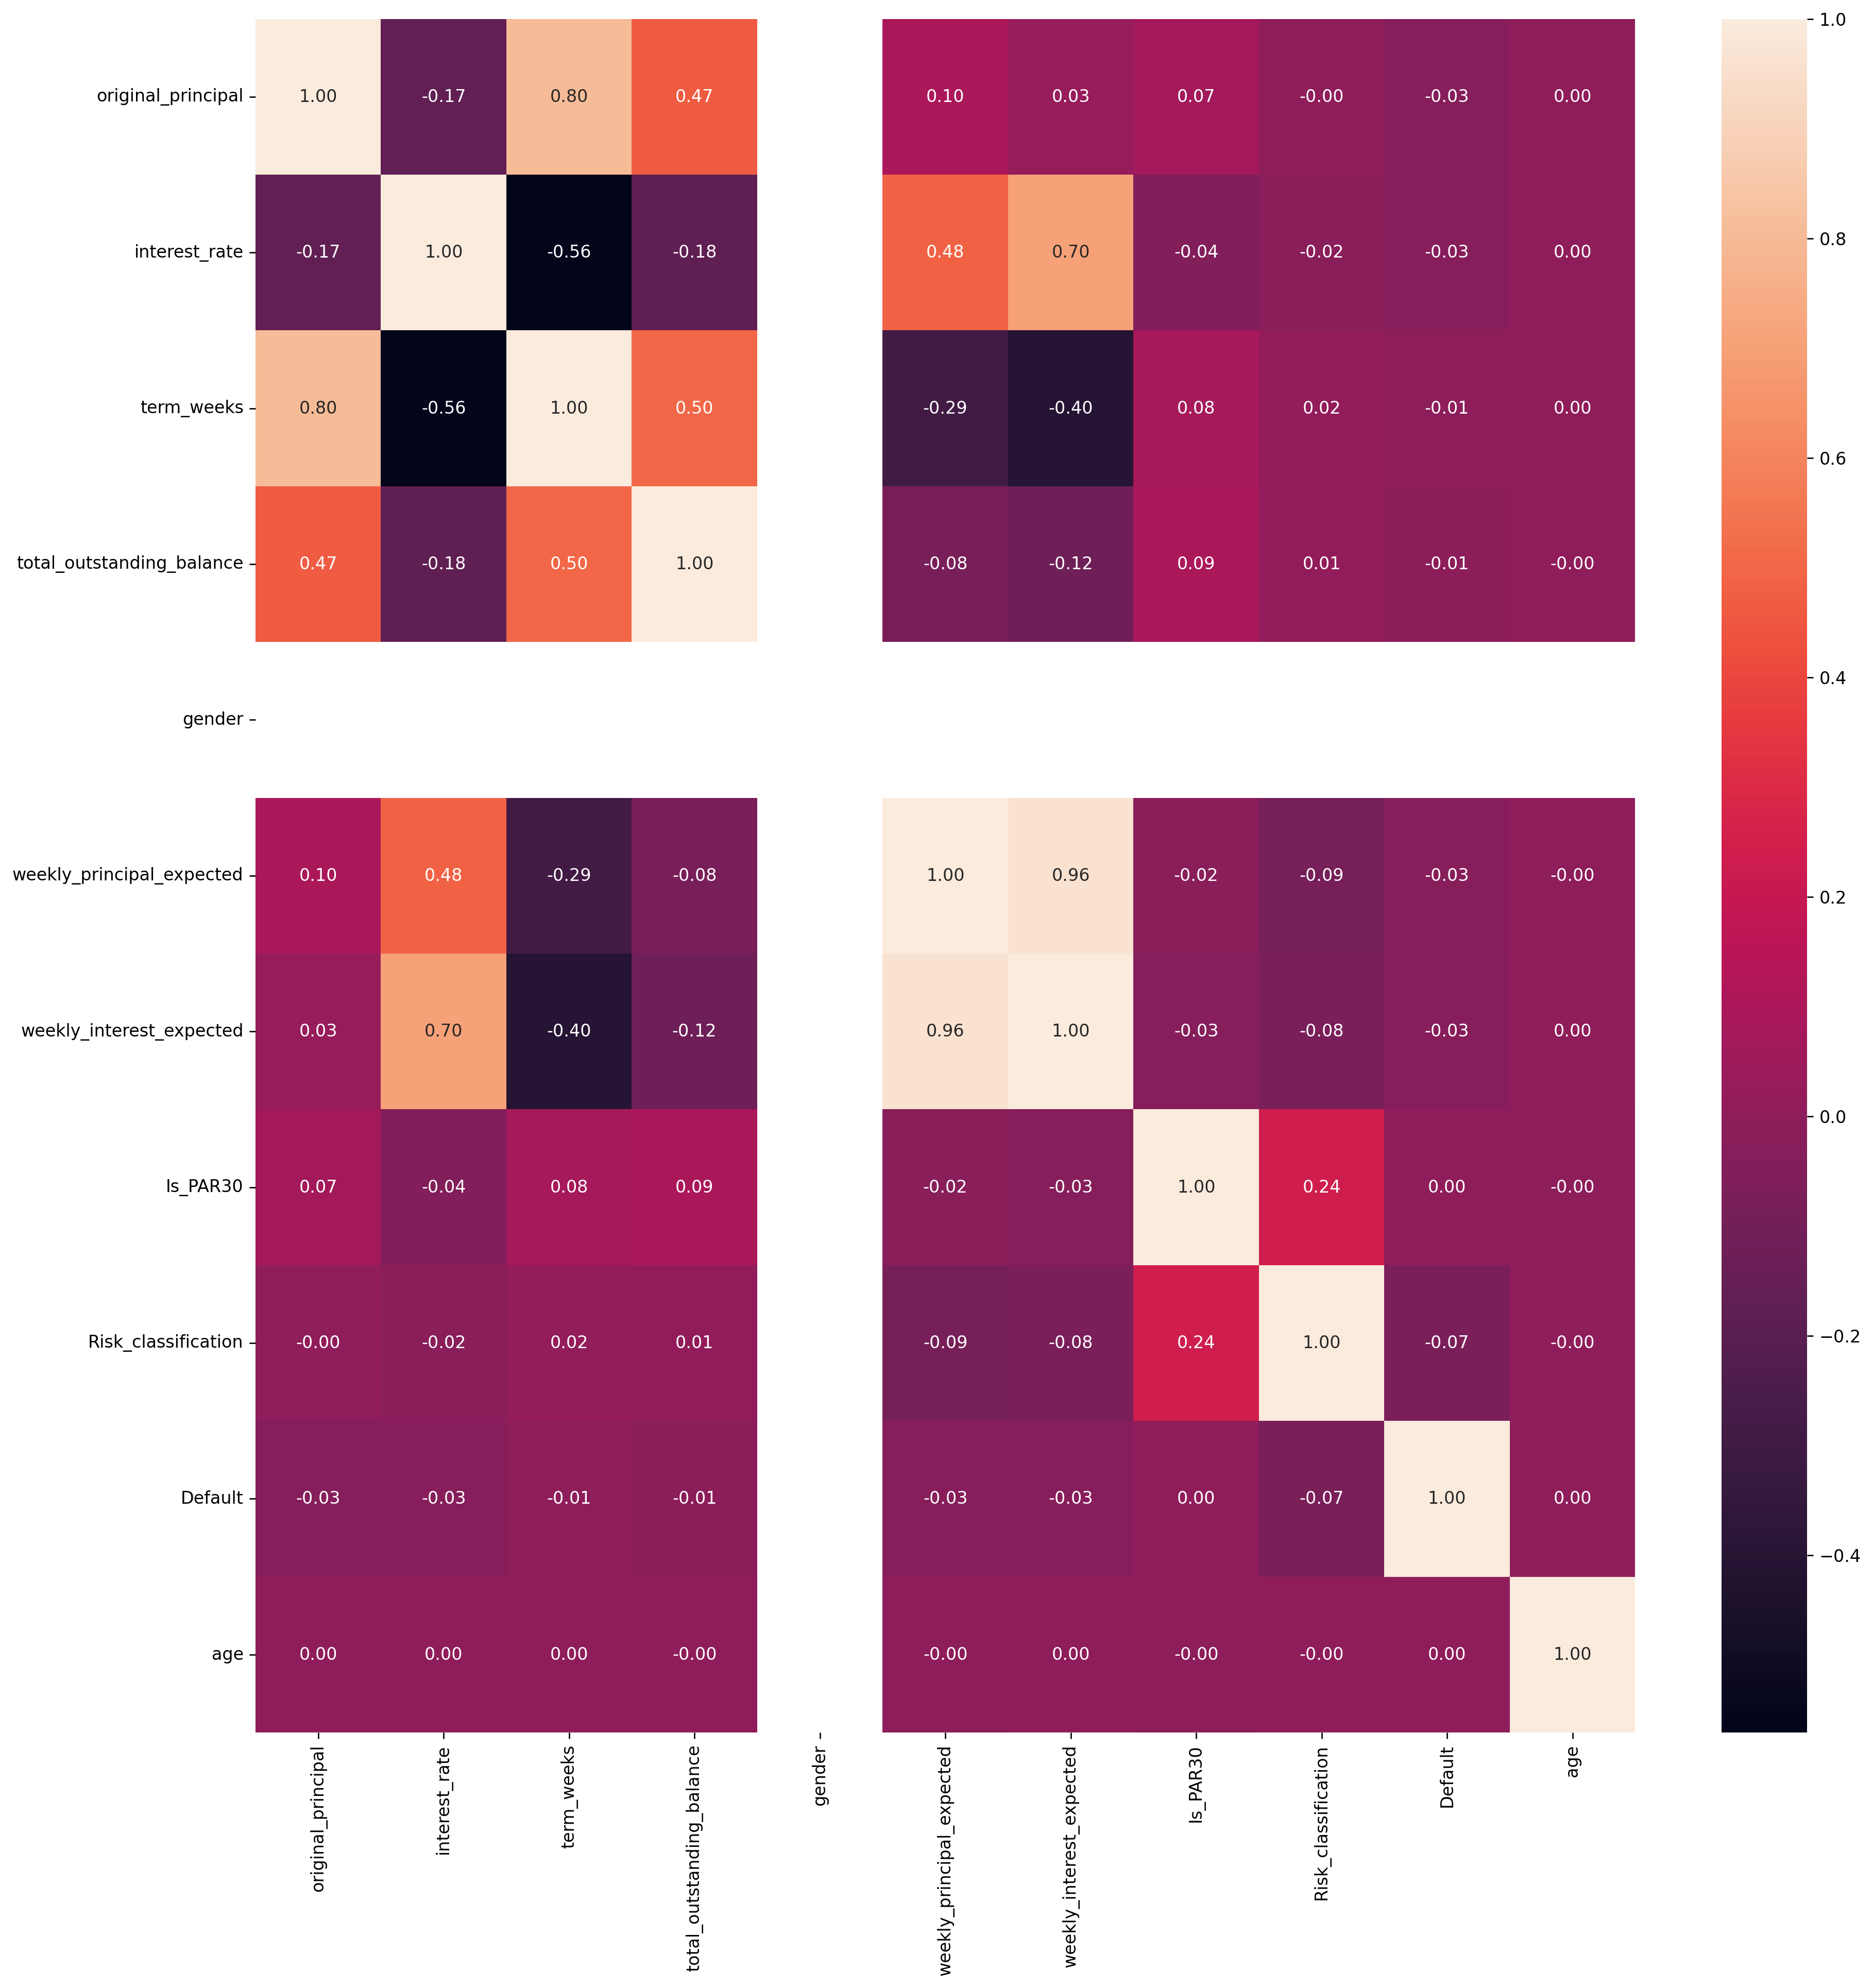

In [90]:
#correlation for Uganda
fig = plt.figure(figsize=(18,18), dpi = 240)
sns.heatmap(data_uganda.corr(), annot = True, fmt = '.2f')

In [91]:
'''
In relation to Default, all other variables are relevant except Gender that has no relationship to default
'''

'\nIn relation to Default, all other variables are relevant except Gender that has no relationship to default\n'

In [92]:
#A Chi-Square Test (for Categorical Variables)
from sklearn.feature_selection import chi2
cat_cols = ['gender','Is_PAR30','Risk_classification']



X_categorical = data_uganda[cat_cols]
y = data_uganda['Default']

# Apply Chi-Square test
chi_scores = chi2(X_categorical, y)
chi_results = pd.DataFrame(chi_scores, index=['chi2_stat', 'p-value'], columns=cat_cols).T
print(chi_results)


                      chi2_stat        p-value
gender                      NaN            NaN
Is_PAR30               1.652095   1.986740e-01
Risk_classification  993.131071  5.588930e-218


In [93]:
'''
Both p-values for 'Is_PAR30' and 'Risk_classification' are (p< 0.05). This indicates that the variables 
have a significant relationship with the Default and can be considered relevant. Gender is irrelevant
'''

"\nBoth p-values for 'Is_PAR30' and 'Risk_classification' are (p< 0.05). This indicates that the variables \nhave a significant relationship with the Default and can be considered relevant. Gender is irrelevant\n"

In [94]:
#Using Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter = 1000)


rfe = RFE(model, n_features_to_select=10)  # Select the top 10 features
X = data_uganda.drop(columns=['Default'])
y = data_uganda['Default']
rfe.fit(X, y)

# Get rankings of features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print(feature_ranking)

original_principal           1
interest_rate                1
term_weeks                   1
total_outstanding_balance    1
gender                       1
weekly_principal_expected    1
weekly_interest_expected     1
Is_PAR30                     1
Risk_classification          1
age                          1
dtype: int32


In [95]:
'''
Since all of these features have been assigned 1, It means theyve been selected as relevant
'''

'\nSince all of these features have been assigned 1, It means theyve been selected as relevant\n'

In [96]:
#To get default,kenya next
'''
I can use the risk buckets, however the classification advised 
is that any loan 30+ days in arrears is just portfolio at risk but not a default
So i will not use it
'''
#Therefore the logic i am using is that any loan with loan status 'written off' was defaulted

data_kenya['loan_status'].value_counts()

loan_status
Completed      47189
Active         46298
Written_Off      209
Name: count, dtype: int64

In [97]:
#This creates the default column depending on the logic used
data_kenya['Default'] = data_kenya['loan_status'].apply(default_func)

C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2166472584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['Default'] = data_kenya['loan_status'].apply(default_func)


In [98]:
# Calculate client age
data_kenya['date_of_birth'] = pd.to_datetime(data_kenya['date_of_birth'])
data_kenya['today'] = pd.Timestamp(datetime.today())
data_kenya['age'] = (data_kenya['today'] - data_kenya['date_of_birth']).dt.days // 365

C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2931299516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['date_of_birth'] = pd.to_datetime(data_kenya['date_of_birth'])
C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2931299516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kenya['today'] = pd.Timestamp(datetime.today())
C:\Users\ECO\AppData\Local\Temp\ipykernel_3856\2931299516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [99]:
# Pick factors in the dataset that you think will affect default
#Drop irrelevant columns
columns = ['loan_id','client_id','branch','asset_type','disbursement_date','report_date','days_in_arrears',
           'principal_outstanding_balance','interest_outstanding_balance','penalties_outstanding_balance',
           'territory','loan_status','account_manager','weekly_expected','weekly_penalties_expected',
           'weekly_principal_repaid','weekly_interest_repaid','weekly_penalties_repaid','weekly_overpayment_repaid',
           'date_of_birth','Closing_Exchange_Rate_ugx','Closing_Exchange_Rate_kes','Total Expected Payment',
           'Total Amount Repaid','Repayment Rate','today']

In [100]:
data_kenya = data_kenya.drop(columns=columns, axis=1)

In [101]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
data_kenya['gender'] = label_encoder.fit_transform(data_kenya['gender'])
data_kenya['Is_PAR30'] = label_encoder.fit_transform(data_kenya['Is_PAR30'])
data_kenya['Risk_classification'] = label_encoder.fit_transform(data_kenya['Risk_classification'])
data_kenya['Default'] = label_encoder.fit_transform(data_kenya['Default'])

In [102]:
# Calculate correlation matrix
correlation_matrix_ = data_kenya.corr()
correlation_ke = correlation_matrix_['Default'].sort_values(ascending=False)
print(correlation_ke)

Default                      1.000000
Is_PAR30                     0.005878
weekly_principal_expected    0.004722
weekly_interest_expected     0.001618
age                         -0.004338
interest_rate               -0.005749
total_outstanding_balance   -0.025838
term_weeks                  -0.036392
original_principal          -0.036604
Risk_classification         -0.089384
gender                            NaN
Name: Default, dtype: float64


<Axes: >

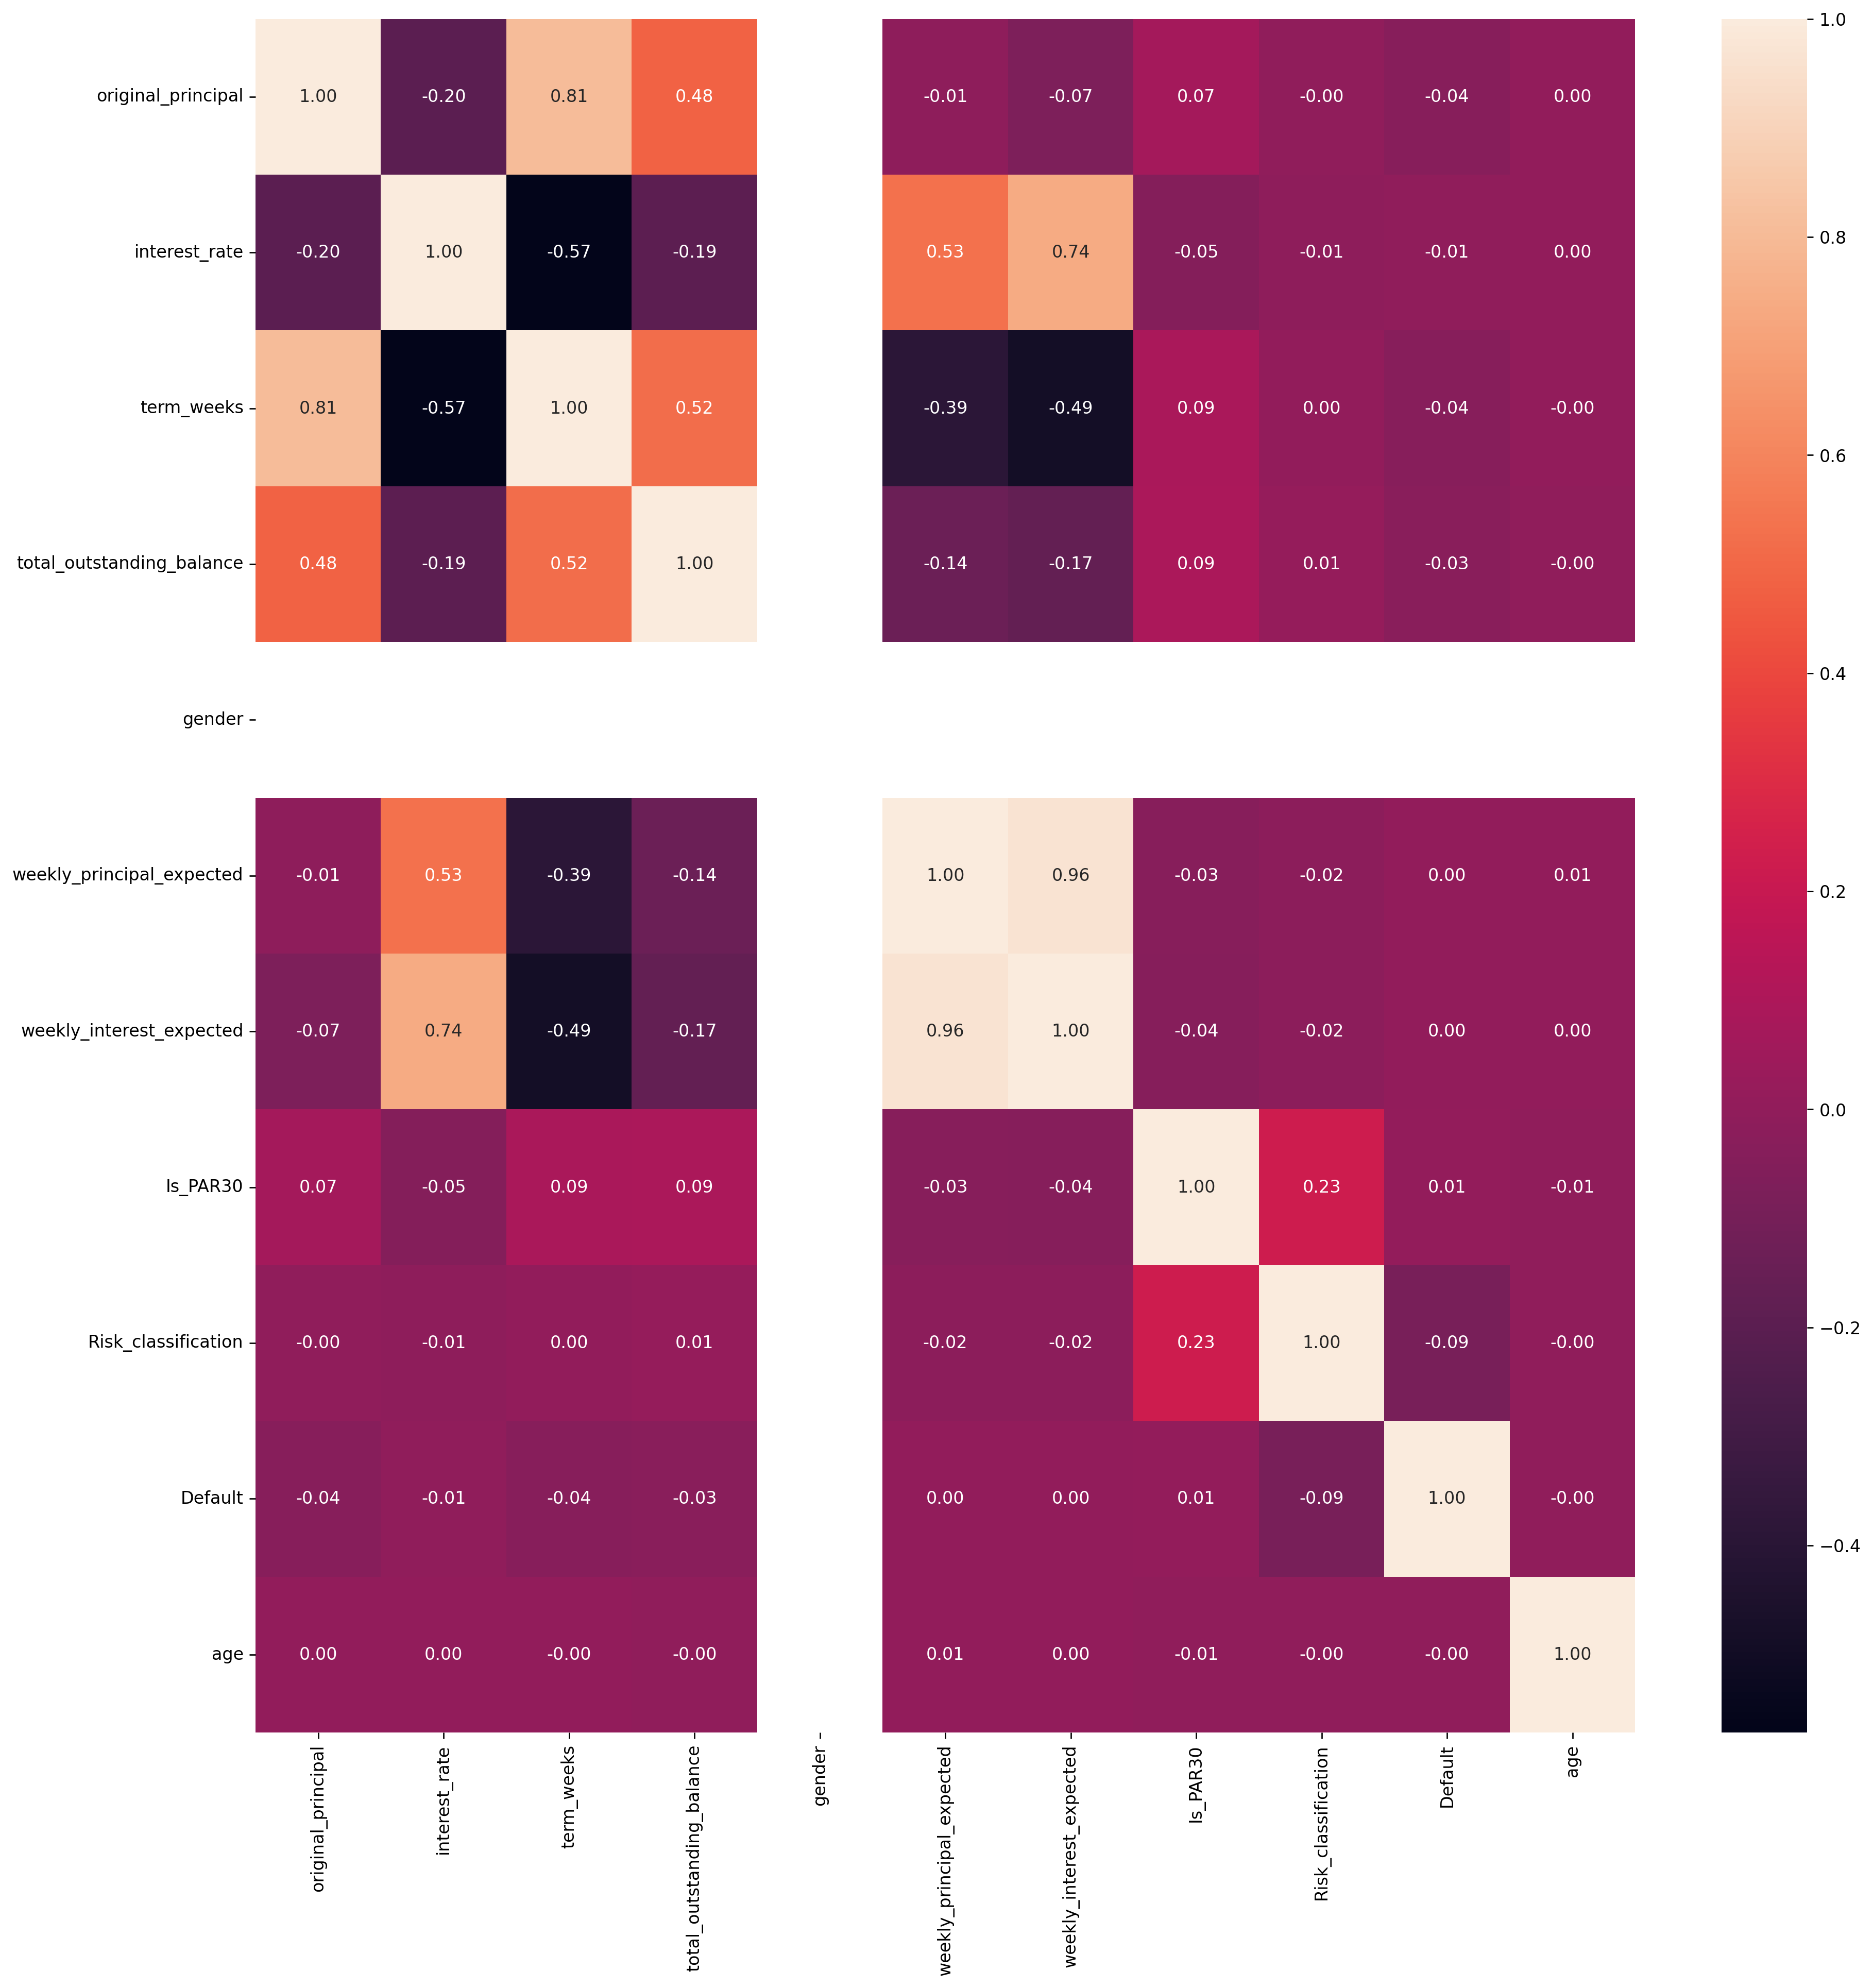

In [103]:
#Correlation for kenya
fig_ = plt.figure(figsize=(18,18), dpi = 240)
sns.heatmap(data_kenya.corr(), annot = True, fmt = '.2f')

In [104]:
#A Chi-Square Test (for Categorical Variables)
from sklearn.feature_selection import chi2
cat_cols_ = ['gender','Is_PAR30','Risk_classification']



X_categorical = data_kenya[cat_cols_]
y = data_kenya['Default']

# Apply Chi-Square test
chi_scores = chi2(X_categorical, y)
chi_results = pd.DataFrame(chi_scores, index=['chi2_stat', 'p-value'], columns=cat_cols_).T
print(chi_results)


                       chi2_stat   p-value
gender                       NaN       NaN
Is_PAR30                3.187973  0.074182
Risk_classification  1620.797867  0.000000


In [105]:
'''
p-value for 'Is_PAR30' is (p>0.05), This indicates that the variables 
has no relationship with the Default

'Risk_classification' is (p< 0.05). This indicates that the variables 
has a significant relationship with the Default and can be considered relevant
'''

"\np-value for 'Is_PAR30' is (p>0.05), This indicates that the variables \nhas no relationship with the Default\n\n'Risk_classification' is (p< 0.05). This indicates that the variables \nhas a significant relationship with the Default and can be considered relevant\n"

In [106]:
#Using Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter = 1000)


rfe = RFE(model, n_features_to_select=10)  # Select the top 10 features
X = data_kenya.drop(columns=['Default'])
y = data_kenya['Default']
rfe.fit(X, y)

# Get rankings of features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print(feature_ranking)

original_principal           1
interest_rate                1
term_weeks                   1
total_outstanding_balance    1
gender                       1
weekly_principal_expected    1
weekly_interest_expected     1
Is_PAR30                     1
Risk_classification          1
age                          1
dtype: int32


In [107]:
'''
Using Recursive Feature Elimination (RFE), All features are relevant
'''

'\nUsing Recursive Feature Elimination (RFE), All features are relevant\n'

In [108]:
#create visualizations in your python project 

In [109]:
#PAR30% Trend: A line chart that shows the trend of PAR30% over time, grouped by month and year of disbursement

In [110]:
data = pd.read_csv(r"F:\All_Projects\Tugende_Assessment\Test2 - Data.csv")
data['Is_PAR30'] = (data['days_in_arrears'] >= 30) & (data['loan_status'] == 'Active')

In [111]:
data['Is_PAR30'].value_counts()

Is_PAR30
False    180270
True       2730
Name: count, dtype: int64

In [112]:
data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Is_PAR30
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-03,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08,False
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-10,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26,False
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-17,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26,False
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-24,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10,False
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-31,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23,False


In [113]:
data['disbursement_date'] = pd.to_datetime(data['disbursement_date'])
data['disbursement_month'] = data['disbursement_date'].dt.strftime('%B')
data['disbursement_year'] = data['disbursement_date'].dt.strftime('%Y')
data['disbursement_month_year'] = data['disbursement_date'].dt.strftime('%B %Y')

In [114]:
time_classification = data.groupby(['disbursement_year', 'disbursement_month','Is_PAR30']).size().reset_index(name='Count')
print(time_classification)

   disbursement_year disbursement_month  Is_PAR30  Count
0               2022              April     False  14011
1               2022              April      True    263
2               2022             August     False  14288
3               2022             August      True    169
4               2022           December     False  13755
5               2022           December      True    153
6               2022           February     False  12599
7               2022           February      True    211
8               2022            January     False  17694
9               2022            January      True    240
10              2022               July     False  16294
11              2022               July      True    176
12              2022               June     False  16233
13              2022               June      True    420
14              2022              March     False  17490
15              2022              March      True    261
16              2022           

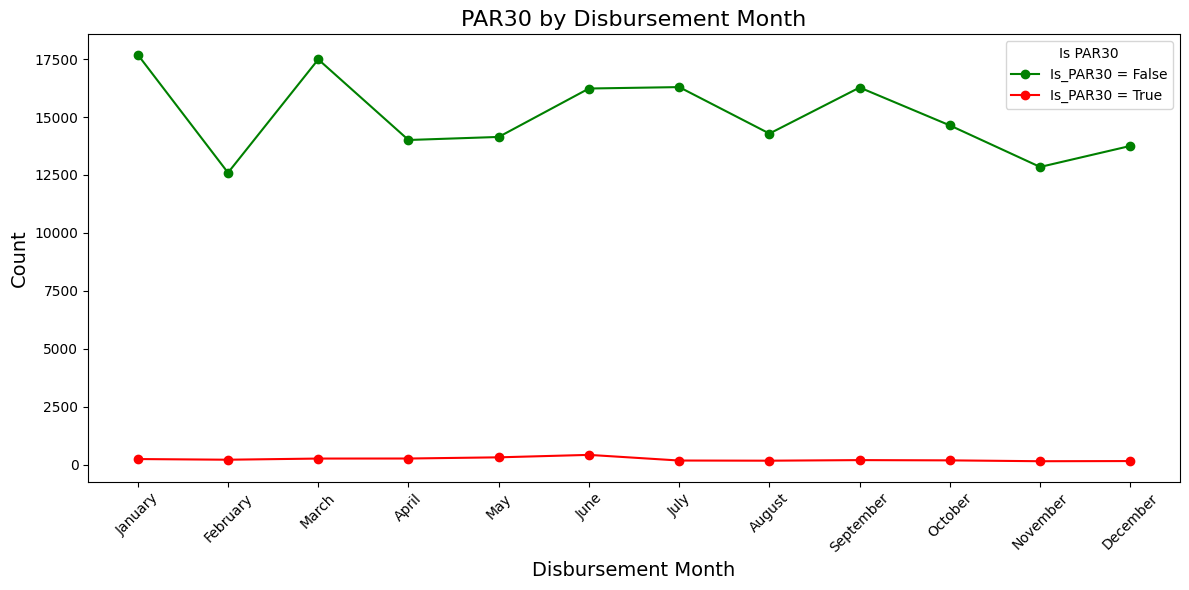

In [115]:

dataM = {
    'disbursement_year': [2022]*24,
    'disbursement_month': [
        'April', 'April', 'August', 'August', 'December', 'December', 
        'February', 'February', 'January', 'January', 'July', 'July', 
        'June', 'June', 'March', 'March', 'May', 'May', 
        'November', 'November', 'October', 'October', 
        'September', 'September'
    ],
    'Is_PAR30': [
        False, True, False, True, False, True, 
        False, True, False, True, False, True, 
        False, True, False, True, False, True, 
        False, True, False, True, False, True
    ],
    'Count': [
        14011, 263, 14288, 169, 13755, 153, 
        12599, 211, 17694, 240, 16294, 176, 
        16233, 420, 17490, 261, 14143, 314, 
        12847, 146, 14640, 183, 16276, 194
    ]
}

df = pd.DataFrame(dataM)


grouped_data = df.groupby(['disbursement_month', 'Is_PAR30'])['Count'].sum().reset_index()


month_order = ['January', 'February', 'March', 'April', 'May', 
               'June', 'July', 'August', 'September', 
               'October', 'November', 'December']


grouped_data['disbursement_month'] = pd.Categorical(
    grouped_data['disbursement_month'], 
    categories=month_order, 
    ordered=True
)

grouped_data = grouped_data.sort_values('disbursement_month')


plt.figure(figsize=(12, 6))
colors = ['green', 'red']


for status, color in zip([False, True], colors):
    data_to_plot = grouped_data[grouped_data['Is_PAR30'] == status]
    plt.plot(data_to_plot['disbursement_month'], data_to_plot['Count'], 
             label=f'Is_PAR30 = {status}', marker='o', color=color)


plt.title('PAR30 by Disbursement Month', fontsize=16)
plt.xlabel('Disbursement Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Is PAR30', loc='upper right')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()

plt.show()




In [116]:
#Risk Buckets by Asset Type
data['Risk_classification'] = data['days_in_arrears'].apply(classify_credit_risk)

In [117]:
data['asset_type'].value_counts()

asset_type
Bike    128832
Cash     54168
Name: count, dtype: int64

In [118]:
data['Risk_classification'].value_counts()

Risk_classification
0-7days      153902
8-14days      13237
15-30days      9841
30+days        6020
Name: count, dtype: int64

In [119]:
data['loan_status'].value_counts()

loan_status
Completed      92165
Active         90513
Written_Off      322
Name: count, dtype: int64

In [120]:
Risk_classifier = data.groupby(['asset_type', 'Risk_classification']).size().reset_index(name='Count')
print(Risk_classifier)

  asset_type Risk_classification   Count
0       Bike             0-7days  108511
1       Bike           15-30days    6554
2       Bike             30+days    4196
3       Bike            8-14days    9571
4       Cash             0-7days   45391
5       Cash           15-30days    3287
6       Cash             30+days    1824
7       Cash            8-14days    3666


In [121]:
pivot_classifier = Risk_classifier.pivot(index='Risk_classification', columns='asset_type', values='Count')
print(pivot_classifier)

asset_type             Bike   Cash
Risk_classification               
0-7days              108511  45391
15-30days              6554   3287
30+days                4196   1824
8-14days               9571   3666


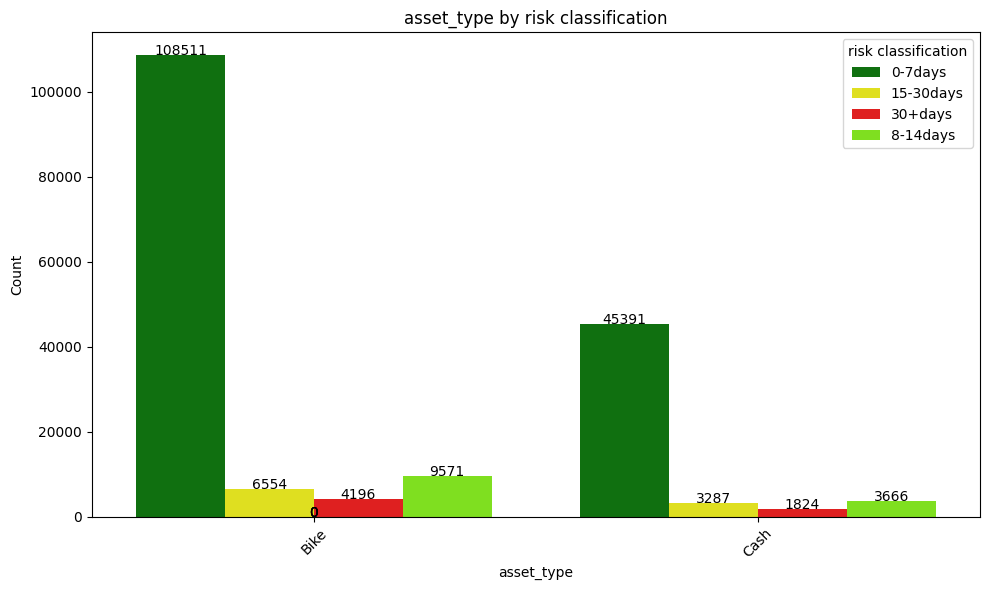

In [122]:
plt.figure(figsize=(10, 6))
colors = ['green','yellow','red','chartreuse']
ax = sns.barplot(data=Risk_classifier, x='asset_type', y='Count', hue='Risk_classification',palette=colors)

# Annotate each bar with its count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height -2, f"{int(height)}", ha="center", fontsize=10)

plt.title('asset_type by risk classification')
plt.xlabel('asset_type')
plt.ylabel('Count')
plt.legend(title='risk classification')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

In [123]:
data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Is_PAR30,disbursement_month,disbursement_year,disbursement_month_year,Risk_classification
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-03,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08,False,July,2022,July 2022,0-7days
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-10,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26,False,July,2022,July 2022,0-7days
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-17,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26,False,July,2022,July 2022,0-7days
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-24,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10,False,July,2022,July 2022,0-7days
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-31,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23,False,July,2022,July 2022,0-7days


In [124]:
# A comparison chart that highlights the PAR30% of the best-performing and worst-performing branches
data['branch'].value_counts()

branch
Kampala    48495
Mbarara    45750
Jinja      44469
Wakiso     44286
Name: count, dtype: int64

In [125]:
branch_classification = data.groupby(['branch','Is_PAR30']).size().reset_index(name='Count')
print(branch_classification)

    branch  Is_PAR30  Count
0    Jinja     False  43847
1    Jinja      True    622
2  Kampala     False  47777
3  Kampala      True    718
4  Mbarara     False  45025
5  Mbarara      True    725
6   Wakiso     False  43621
7   Wakiso      True    665


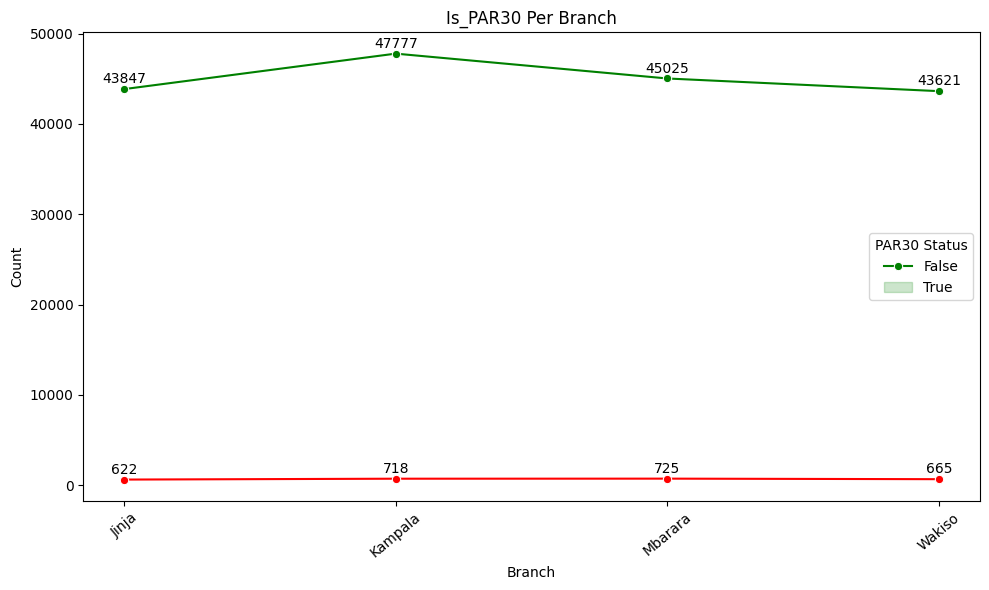

In [126]:

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=branch_classification,
    x='branch',
    y='Count',
    hue='Is_PAR30',
    palette={True: 'red', False: 'green'}, 
    marker='o'
)

for i in range(len(branch_classification)):
    plt.text(
        x=branch_classification['branch'][i],
        y=branch_classification['Count'][i] + 300,
        s=branch_classification['Count'][i],
        ha='center',
        va='bottom',
        color='black',
        fontsize=10
    )

plt.title('Is_PAR30 Per Branch')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='PAR30 Status', labels=['False', 'True'])
plt.xticks(rotation=40)
plt.grid(False)
plt.tight_layout()
plt.show()

In [127]:
#PAR30% by age (three age brackets below 30, 31 - 50, 50+)
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])
data['today'] = pd.Timestamp(datetime.today())
data['age'] = (data['today'] - data['date_of_birth']).dt.days // 365

In [128]:
def classify_age(num):
    if num <= 30:
        return 'Age <=30'
    elif 31 <= num <=50:
        return 'Age 31-50'
    else:
        return 'Age 50+'

In [129]:
data.head()

,loan_id,client_id,branch,asset_type,original_principal,interest_rate,term_weeks,disbursement_date,report_date,days_in_arrears,principal_outstanding_balance,interest_outstanding_balance,penalties_outstanding_balance,total_outstanding_balance,gender,territory,loan_status,account_manager,weekly_expected,weekly_principal_expected,weekly_interest_expected,weekly_penalties_expected,weekly_principal_repaid,weekly_interest_repaid,weekly_penalties_repaid,weekly_overpayment_repaid,date_of_birth,Is_PAR30,disbursement_month,disbursement_year,disbursement_month_year,Risk_classification,today,age
0,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-03,0,78500,0,0,78500,F,Kenya,Active,Manager_1,25900,25000,900,0,21500,3500,0,0,1978-01-08,False,July,2022,July 2022,0-7days,2024-10-07 09:39:16.523881,46
1,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-10,0,49500,0,0,49500,F,Kenya,Active,Manager_1,25900,25000,900,0,29000,0,0,0,1959-10-26,False,July,2022,July 2022,0-7days,2024-10-07 09:39:16.523881,64
2,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-17,0,25700,0,0,25700,F,Kenya,Active,Manager_1,25900,25000,900,0,23800,0,0,0,1991-11-26,False,July,2022,July 2022,0-7days,2024-10-07 09:39:16.523881,32
3,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-24,0,0,0,0,0,F,Kenya,Active,Manager_1,25900,25000,900,0,25700,0,0,4700,1987-05-10,False,July,2022,July 2022,0-7days,2024-10-07 09:39:16.523881,37
4,L0001,C9293,Wakiso,Cash,100000,0.035,4,2022-07-10,2021-01-31,0,0,0,0,0,F,Kenya,Completed,Manager_1,25900,25000,900,0,0,0,0,0,1968-07-23,False,July,2022,July 2022,0-7days,2024-10-07 09:39:16.523881,56


In [130]:
data['Age_classification'] = data['age'].apply(classify_age)

In [131]:
data['Age_classification'].value_counts()

Age_classification
Age 31-50    76013
Age 50+      56534
Age <=30     50453
Name: count, dtype: int64

In [132]:
age_classification = data.groupby(['Age_classification','Is_PAR30']).size().reset_index(name='Count')
print(age_classification)

  Age_classification  Is_PAR30  Count
0          Age 31-50     False  74918
1          Age 31-50      True   1095
2            Age 50+     False  55710
3            Age 50+      True    824
4           Age <=30     False  49642
5           Age <=30      True    811


In [133]:
pivot_dat = age_classification.pivot(index='Is_PAR30', columns='Age_classification', values='Count')

<Figure size 1200x800 with 0 Axes>

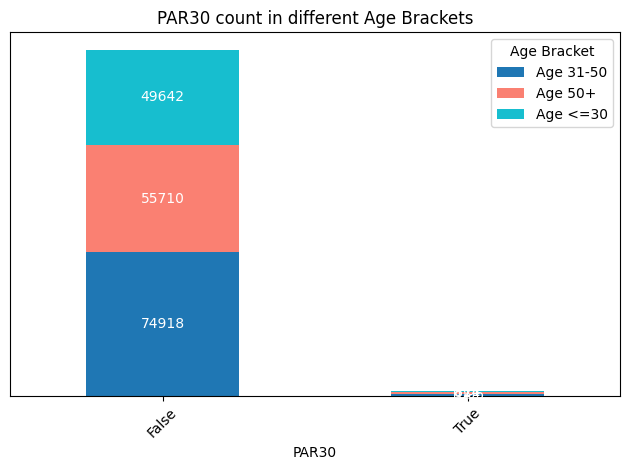

In [134]:
custom_colors = ['#1f77b4','salmon', '#17becf']
plt.figure(figsize=(12, 8))
ax = pivot_dat.plot(kind='bar', stacked=True,color=custom_colors)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d',color='white')
plt.title('PAR30 count in different Age Brackets')
plt.xlabel('PAR30')

plt.legend(title='Age Bracket')
plt.xticks(rotation=45)

plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.grid(False)
plt.show()

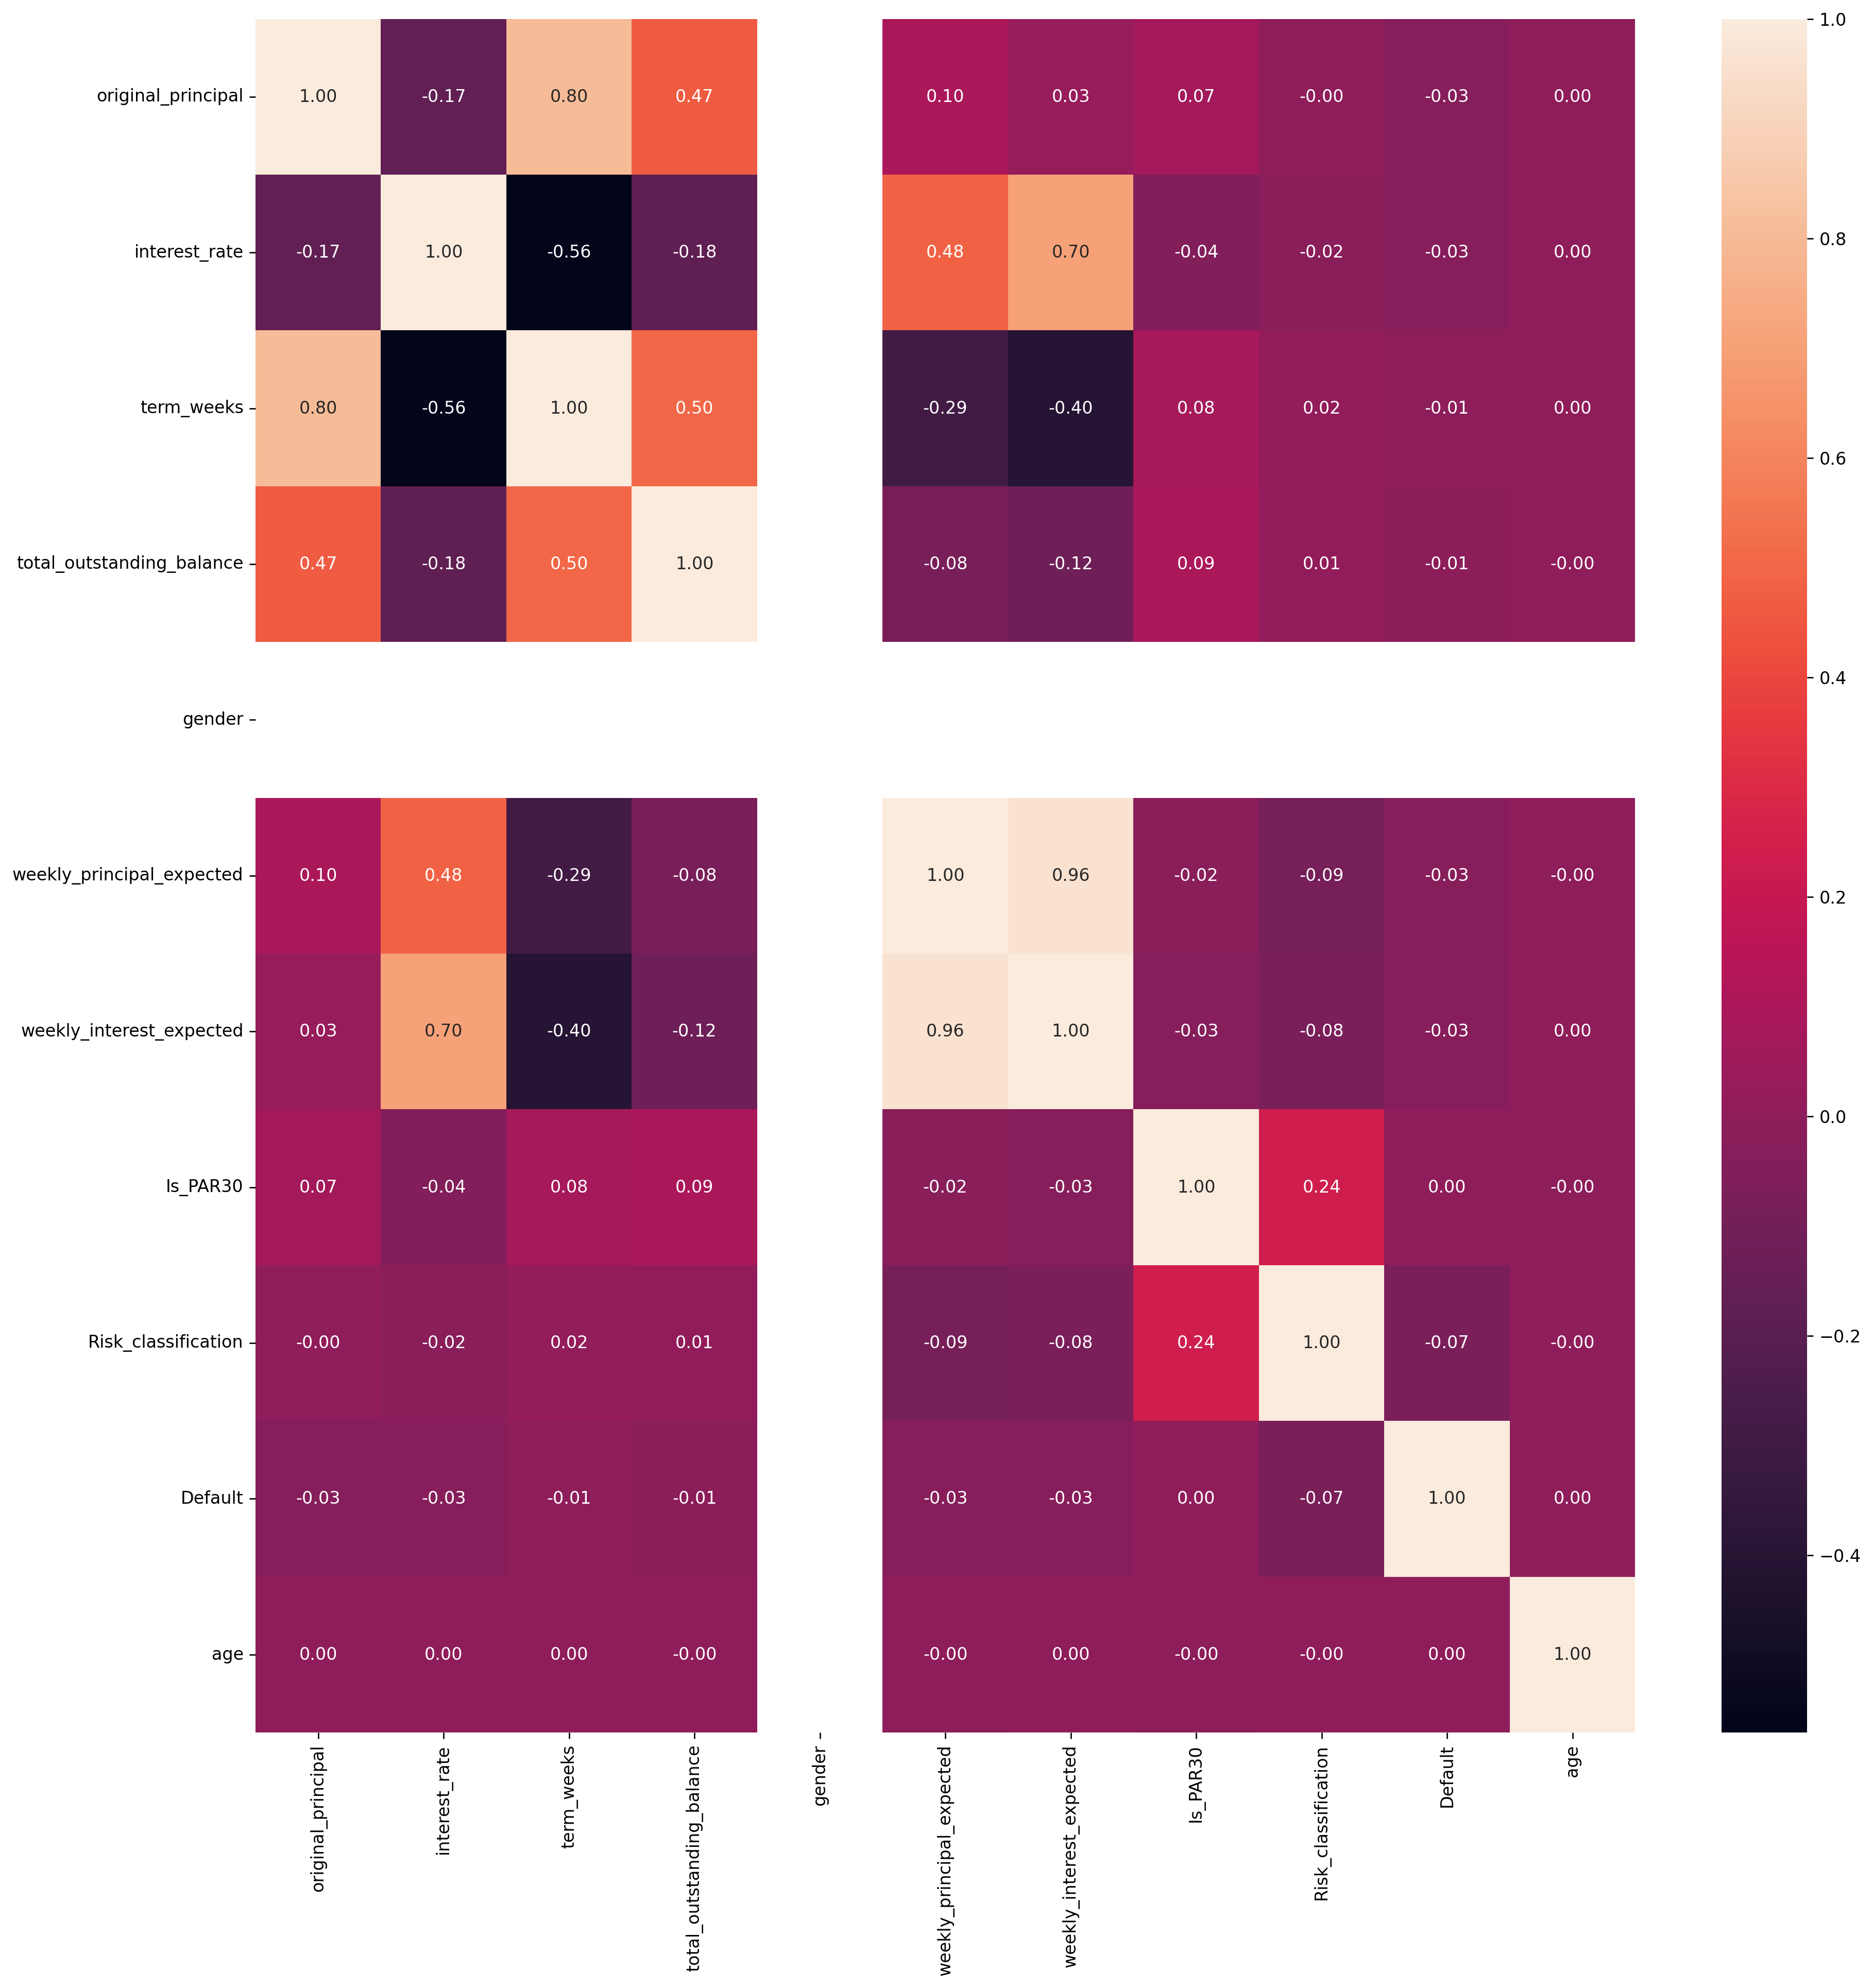

In [135]:
#Impact of Significant Factors on default rate

fig = plt.figure(figsize=(18,18), dpi = 240)
sns.heatmap(data_uganda.corr(), annot = True, fmt = '.2f')
plt.grid(False)